# Step 1: Installation and Setup

In [ ]:
%pip install --upgrade tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Data preprocessing

In [ ]:
# importing the dataset
from tensorflow.keras.datasets import mnist

In [ ]:
# loading the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


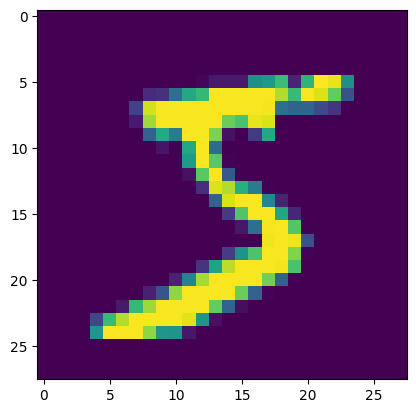

In [ ]:
plt.imshow(x_train[0])

In [ ]:
y_train[0]

np.uint8(5)

In [ ]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
x_train.min(), x_train.max()

(np.uint8(0), np.uint8(255))

In [ ]:
y_train.min(), y_train.max()

(np.uint8(0), np.uint8(9))

In [ ]:
# normalize the images
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
x_train.min(), x_train.max()

(np.float64(0.0), np.float64(1.0))

In [ ]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
# reshape the images
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [ ]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
input_shape = x_train[0].shape

In [ ]:
print(input_shape)

(28, 28, 1)


# Step 3: Building the Model

In [ ]:
# define an object
model = tf.keras.models.Sequential()

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Input(shape=(28,28,1)))

# 1st CNN layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'))

# 2nd CNN layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

# MaxPooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

# Dropout layer
model.add(tf.keras.layers.Dropout(0.4))

# Flatten layer
model.add(tf.keras.layers.Flatten())

# Fully connected layer
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Output layer
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

# Step 4: Training the model

In [ ]:
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 166s 349ms/step - loss: 0.3667 - sparse_categorical_accuracy: 0.8875 - val_loss: 0.0444 - val_sparse_categorical_accuracy: 0.9848
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 148s 316ms/step - loss: 0.0535 - sparse_categorical_accuracy: 0.9828 - val_loss: 0.0339 - val_sparse_categorical_accuracy: 0.9886
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 201s 314ms/step - loss: 0.0349 - sparse_categorical_accuracy: 0.9888 - val_loss: 0.0342 - val_sparse_categorical_accuracy: 0.9892
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 207s 325ms/step - loss: 0.0246 - sparse_categorical_accuracy: 0.9922 - val_loss: 0.0320 - val_sparse_categorical_accuracy: 0.9896
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 150s 319ms/step - loss: 0.0193 - sparse_categorical_accuracy: 0.9936 - val_loss: 0.0317 - val_sparse_categorical_accuracy: 0.9902
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 145s 309ms/step - loss: 0.0141 - sparse_categorical_accuracy: 0.9958 - val_loss: 0.0330 - val_sparse_categoric

In [ ]:
# model predictions
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step


In [ ]:
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
if y_test.ndim > 1 and y_test.shape[1] > 1:
    y_test_classes = np.argmax(y_test, axis=1)
else:
    y_test_classes = y_test

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.9917


# Step 5: Learning curve

In [ ]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
  plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

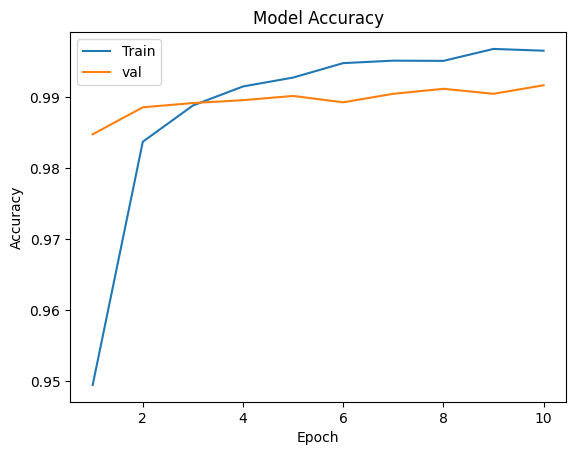

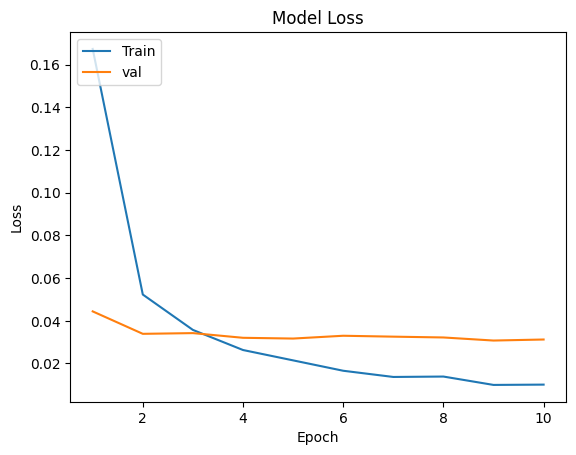

In [ ]:
learning_curve(history, 10)